In [135]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score

In [3]:
sf_permits = pd.read_csv("./building-permit-applications-data/Building_Permits.csv")

/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
sf_permits.columns

Index([u'Permit Number', u'Permit Type', u'Permit Type Definition',
       u'Permit Creation Date', u'Block', u'Lot', u'Street Number',
       u'Street Number Suffix', u'Street Name', u'Street Suffix', u'Unit',
       u'Unit Suffix', u'Description', u'Current Status',
       u'Current Status Date', u'Filed Date', u'Issued Date',
       u'Completed Date', u'First Construction Document Date',
       u'Structural Notification', u'Number of Existing Stories',
       u'Number of Proposed Stories', u'Voluntary Soft-Story Retrofit',
       u'Fire Only Permit', u'Permit Expiration Date', u'Estimated Cost',
       u'Revised Cost', u'Existing Use', u'Existing Units', u'Proposed Use',
       u'Proposed Units', u'Plansets', u'TIDF Compliance',
       u'Existing Construction Type',
       u'Existing Construction Type Description',
       u'Proposed Construction Type',
       u'Proposed Construction Type Description', u'Site Permit',
       u'Supervisor District', u'Neighborhoods - Analysis Boundari

In [5]:
sf_permits2 = sf_permits[['Permit Type','Filed Date','Issued Date','Supervisor District','Zipcode','Current Status']]
#sf_permits2 = sf_permits.drop(['Permit Number','Permit Type Definition','Block','Lot','Street Number','Street Number Suffix','Street Name','Street Suffix','Unit','Unit Suffix','Description','Structural Notification','Number of Existing Stories','Number of Proposed Stories','Voluntary Soft-Story Retrofit','Fire Only Permit','Existing Use','Existing Units','Proposed Use','Proposed Units','Plansets','TIDF Compliance','Existing Construction Type','Existing Construction Type Description','Proposed Construction Type','Proposed Construction Type Description','Site Permit','Neighborhoods - Analysis Boundaries','Location','Record ID'],axis = 1)

In [6]:
sf_permits2

,Permit Type,Filed Date,Issued Date,Supervisor District,Zipcode,Current Status
0,4,05/06/2015,11/09/2015,3.0,94102.0,expired
1,4,04/19/2016,08/03/2017,3.0,94102.0,issued
2,3,05/27/2016,NaN,3.0,94109.0,withdrawn
3,8,11/07/2016,07/18/2017,3.0,94109.0,complete
4,6,11/28/2016,12/01/2017,6.0,94102.0,issued
5,8,06/14/2017,07/06/2017,10.0,94107.0,issued
6,8,06/30/2017,06/30/2017,5.0,94122.0,complete
7,8,06/30/2017,06/30/2017,10.0,94124.0,issued
8,8,07/05/2017,07/05/2017,5.0,94117.0,issued
9,8,07/06/2017,07/06/2017,8.0,94117.0,issued


In [7]:
sf_permits2['Current Status']

0           expired
1            issued
2         withdrawn
3          complete
4            issued
5            issued
6          complete
7            issued
8            issued
9            issued
10           issued
11           issued
12           issued
13            filed
14           issued
15           issued
16           issued
17           issued
18            filed
19           issued
20           issued
21            filed
22            filed
23           issued
24           issued
25           issued
26           issued
27           issued
28           issued
29           issued
            ...    
198870       issued
198871       issued
198872        filed
198873       issued
198874       issued
198875        filed
198876       issued
198877       issued
198878        filed
198879       issued
198880       issued
198881       issued
198882       issued
198883       issued
198884        filed
198885        filed
198886     approved
198887     complete
198888     complete


In [8]:
df2 = sf_permits2.loc[sf_permits2['Current Status'].isin(['issued','complete'])]

In [9]:
df2['Current Status']

1           issued
3         complete
4           issued
5           issued
6         complete
7           issued
8           issued
9           issued
10          issued
11          issued
12          issued
14          issued
15          issued
16          issued
17          issued
19          issued
20          issued
23          issued
24          issued
25          issued
26          issued
27          issued
28          issued
29          issued
30          issued
31          issued
32          issued
34          issued
35          issued
36          issued
            ...   
198858      issued
198861      issued
198863      issued
198865      issued
198867      issued
198868      issued
198869      issued
198870      issued
198871      issued
198873      issued
198874      issued
198876      issued
198877      issued
198879      issued
198880      issued
198881      issued
198882      issued
198883      issued
198887    complete
198888    complete
198889    complete
198891      

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180636 entries, 1 to 198899
Data columns (total 6 columns):
Permit Type            180636 non-null int64
Filed Date             180636 non-null object
Issued Date            180618 non-null object
Supervisor District    178999 non-null float64
Zipcode                179000 non-null float64
Current Status         180636 non-null object
dtypes: float64(2), int64(1), object(3)
memory usage: 14.6+ MB


In [11]:
missing = df2.isnull().sum()

In [12]:
missing

Permit Type               0
Filed Date                0
Issued Date              18
Supervisor District    1637
Zipcode                1636
Current Status            0
dtype: int64

In [13]:
#df3 = df2.drop(['Completed Date','Permit Expiration Date','Estimated Cost'] ,axis=1)

In [14]:
#missing2 = df3.isnull().sum()

In [15]:
#missing2

In [16]:
df4 = df2[pd.notnull(df2['Issued Date'])]

In [17]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180618 entries, 1 to 198899
Data columns (total 6 columns):
Permit Type            180618 non-null int64
Filed Date             180618 non-null object
Issued Date            180618 non-null object
Supervisor District    178981 non-null float64
Zipcode                178982 non-null float64
Current Status         180618 non-null object
dtypes: float64(2), int64(1), object(3)
memory usage: 9.6+ MB


In [18]:
# import datetime as dt
# df4['Permit Creation Date'] = pd.to_datetime(df4['Permit Creation Date'])
# df4['Permit Creation Date66']=df4['Permit Creation Date'].map(dt.datetime.toordinal)

In [19]:
#df4['Permit Creation Date66']

In [20]:
status = pd.Series(np.where(df4['Current Status']=='issued',1,0),name='Current Status')

In [21]:
status

0         1
1         0
2         1
3         1
4         0
5         1
6         1
7         1
8         1
9         1
10        1
11        1
12        1
13        1
14        1
15        1
16        1
17        1
18        1
19        1
20        1
21        1
22        1
23        1
24        1
25        1
26        1
27        1
28        1
29        1
         ..
180588    1
180589    1
180590    1
180591    1
180592    1
180593    1
180594    1
180595    1
180596    1
180597    1
180598    1
180599    1
180600    1
180601    1
180602    1
180603    1
180604    1
180605    1
180606    0
180607    0
180608    0
180609    1
180610    1
180611    0
180612    1
180613    1
180614    1
180615    1
180616    1
180617    1
Name: Current Status, Length: 180618, dtype: int64

In [22]:
#import datetime as dt
#df4['Current Status Date'] = pd.to_datetime(df4['Current Status Date'])
#df4['Current Status Date66']=df4['Current Status Date'].map(dt.datetime.toordinal)

In [23]:
#df4['Current Status Date66']

In [24]:
#df4['Filed Date'] = pd.to_datetime(df4['Filed Date'])
#df4['Filed Date66']=df4['Filed Date'].map(dt.datetime.toordinal)

In [25]:
#df4['Filed Date66']

In [26]:
#df4['Issued Date'] = pd.to_datetime(df4['Issued Date'])
#df4['Issued Date66']=df4['Issued Date'].map(dt.datetime.toordinal)

In [27]:
#df4['Issued Date66']

In [28]:
df5 = df4

In [29]:
df5

,Permit Type,Filed Date,Issued Date,Supervisor District,Zipcode,Current Status
1,4,04/19/2016,08/03/2017,3.0,94102.0,issued
3,8,11/07/2016,07/18/2017,3.0,94109.0,complete
4,6,11/28/2016,12/01/2017,6.0,94102.0,issued
5,8,06/14/2017,07/06/2017,10.0,94107.0,issued
6,8,06/30/2017,06/30/2017,5.0,94122.0,complete
7,8,06/30/2017,06/30/2017,10.0,94124.0,issued
8,8,07/05/2017,07/05/2017,5.0,94117.0,issued
9,8,07/06/2017,07/06/2017,8.0,94117.0,issued
10,8,07/06/2017,07/06/2017,8.0,94114.0,issued
11,8,07/07/2017,07/07/2017,5.0,94102.0,issued


In [30]:
#df5 = df5.drop(columns=['Current Status','First Construction Document Date','Permit Creation Date','Current Status Date','Filed Date','Issued Date'])

In [31]:
#df5

In [32]:
df6=pd.concat([df5, status], axis=1)

In [33]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195142 entries, 0 to 198899
Data columns (total 7 columns):
Permit Type            180618 non-null float64
Filed Date             180618 non-null object
Issued Date            180618 non-null object
Supervisor District    178981 non-null float64
Zipcode                178982 non-null float64
Current Status         180618 non-null object
Current Status         180618 non-null float64
dtypes: float64(4), object(3)
memory usage: 11.9+ MB


In [34]:
# remove null rows
df7 = df6[pd.notnull(df6['Zipcode'])]

In [35]:
df7

,Permit Type,Filed Date,Issued Date,Supervisor District,Zipcode,Current Status,Current Status
1,4.0,04/19/2016,08/03/2017,3.0,94102.0,issued,0.0
3,8.0,11/07/2016,07/18/2017,3.0,94109.0,complete,1.0
4,6.0,11/28/2016,12/01/2017,6.0,94102.0,issued,0.0
5,8.0,06/14/2017,07/06/2017,10.0,94107.0,issued,1.0
6,8.0,06/30/2017,06/30/2017,5.0,94122.0,complete,1.0
7,8.0,06/30/2017,06/30/2017,10.0,94124.0,issued,1.0
8,8.0,07/05/2017,07/05/2017,5.0,94117.0,issued,1.0
9,8.0,07/06/2017,07/06/2017,8.0,94117.0,issued,1.0
10,8.0,07/06/2017,07/06/2017,8.0,94114.0,issued,1.0
11,8.0,07/07/2017,07/07/2017,5.0,94102.0,issued,1.0


In [36]:
df8 = df7.dropna()

In [37]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164522 entries, 1 to 180617
Data columns (total 7 columns):
Permit Type            164522 non-null float64
Filed Date             164522 non-null object
Issued Date            164522 non-null object
Supervisor District    164522 non-null float64
Zipcode                164522 non-null float64
Current Status         164522 non-null object
Current Status         164522 non-null float64
dtypes: float64(4), object(3)
memory usage: 10.0+ MB


In [38]:
#df7 = df7[pd.notnull(df7['Current Status'])]

In [39]:
#df7 = df7[pd.notnull(df7['Revised Cost'])]

In [40]:
#df7 = df7[pd.notnull(df7['Supervisor District'])]

In [41]:
#df7.info()

In [42]:
zips = pd.get_dummies( df8['Zipcode'] , prefix = 'z' )

In [43]:
zips

,z_94102.0,z_94103.0,z_94104.0,z_94105.0,z_94107.0,z_94108.0,z_94109.0,z_94110.0,z_94111.0,z_94112.0,...,z_94123.0,z_94124.0,z_94127.0,z_94129.0,z_94130.0,z_94131.0,z_94132.0,z_94133.0,z_94134.0,z_94158.0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df8=pd.concat([df8, zips], axis=1)

In [45]:
df8

,Permit Type,Filed Date,Issued Date,Supervisor District,Zipcode,Current Status,Current Status,z_94102.0,z_94103.0,z_94104.0,...,z_94123.0,z_94124.0,z_94127.0,z_94129.0,z_94130.0,z_94131.0,z_94132.0,z_94133.0,z_94134.0,z_94158.0
1,4.0,04/19/2016,08/03/2017,3.0,94102.0,issued,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8.0,11/07/2016,07/18/2017,3.0,94109.0,complete,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6.0,11/28/2016,12/01/2017,6.0,94102.0,issued,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,8.0,06/14/2017,07/06/2017,10.0,94107.0,issued,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,8.0,06/30/2017,06/30/2017,5.0,94122.0,complete,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,8.0,06/30/2017,06/30/2017,10.0,94124.0,issued,1.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,8.0,07/05/2017,07/05/2017,5.0,94117.0,issued,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,8.0,07/06/2017,07/06/2017,8.0,94117.0,issued,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,8.0,07/06/2017,07/06/2017,8.0,94114.0,issued,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,8.0,07/07/2017,07/07/2017,5.0,94102.0,issued,1.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df8.drop(['Zipcode'], axis=1,inplace=True)

In [47]:
df8

,Permit Type,Filed Date,Issued Date,Supervisor District,Current Status,Current Status,z_94102.0,z_94103.0,z_94104.0,z_94105.0,...,z_94123.0,z_94124.0,z_94127.0,z_94129.0,z_94130.0,z_94131.0,z_94132.0,z_94133.0,z_94134.0,z_94158.0
1,4.0,04/19/2016,08/03/2017,3.0,issued,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8.0,11/07/2016,07/18/2017,3.0,complete,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6.0,11/28/2016,12/01/2017,6.0,issued,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,8.0,06/14/2017,07/06/2017,10.0,issued,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,8.0,06/30/2017,06/30/2017,5.0,complete,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,8.0,06/30/2017,06/30/2017,10.0,issued,1.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,8.0,07/05/2017,07/05/2017,5.0,issued,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,8.0,07/06/2017,07/06/2017,8.0,issued,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,8.0,07/06/2017,07/06/2017,8.0,issued,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,8.0,07/07/2017,07/07/2017,5.0,issued,1.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df8['Permit Type'].unique()

array([ 4.,  8.,  6.,  3.,  7.,  1.,  2.,  5.])

In [49]:
permitTypes = pd.get_dummies( df8['Permit Type'] , prefix = 'pt' )

In [50]:
permitTypes

,pt_1.0,pt_2.0,pt_3.0,pt_4.0,pt_5.0,pt_6.0,pt_7.0,pt_8.0
1,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,1
10,0,0,0,0,0,0,0,1
11,0,0,0,0,0,0,0,1


In [51]:
sd = pd.get_dummies( df8['Supervisor District'] , prefix = 'sd' )

In [52]:
sd

,sd_1.0,sd_2.0,sd_3.0,sd_4.0,sd_5.0,sd_6.0,sd_7.0,sd_8.0,sd_9.0,sd_10.0,sd_11.0
1,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,1,0
6,0,0,0,0,1,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,1,0,0,0,0,0,0
9,0,0,0,0,0,0,0,1,0,0,0
10,0,0,0,0,0,0,0,1,0,0,0
11,0,0,0,0,1,0,0,0,0,0,0


In [53]:
df8 = df8.drop(['Permit Type','Supervisor District'],axis=1)

In [54]:
df8=pd.concat([df8, permitTypes], axis=1)

In [55]:
df8=pd.concat([df8, sd], axis=1)

In [56]:
df8.head()

,Filed Date,Issued Date,Current Status,Current Status,z_94102.0,z_94103.0,z_94104.0,z_94105.0,z_94107.0,z_94108.0,...,sd_2.0,sd_3.0,sd_4.0,sd_5.0,sd_6.0,sd_7.0,sd_8.0,sd_9.0,sd_10.0,sd_11.0
1,04/19/2016,08/03/2017,issued,0.0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,11/07/2016,07/18/2017,complete,1.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,11/28/2016,12/01/2017,issued,0.0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,06/14/2017,07/06/2017,issued,1.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
6,06/30/2017,06/30/2017,complete,1.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [57]:
df8 = df8.drop(['Current Status'],axis=1)

In [58]:
df8=pd.concat([df8, status], axis=1)

In [59]:
df8.info()

#df8 = df8.drop(['First Construction Document Date','Permit Creation Date','Current Status Date'],axis=1)
df8.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180618 entries, 0 to 180617
Data columns (total 49 columns):
Filed Date        164522 non-null object
Issued Date       164522 non-null object
z_94102.0         164522 non-null float64
z_94103.0         164522 non-null float64
z_94104.0         164522 non-null float64
z_94105.0         164522 non-null float64
z_94107.0         164522 non-null float64
z_94108.0         164522 non-null float64
z_94109.0         164522 non-null float64
z_94110.0         164522 non-null float64
z_94111.0         164522 non-null float64
z_94112.0         164522 non-null float64
z_94114.0         164522 non-null float64
z_94115.0         164522 non-null float64
z_94116.0         164522 non-null float64
z_94117.0         164522 non-null float64
z_94118.0         164522 non-null float64
z_94121.0         164522 non-null float64
z_94122.0         164522 non-null float64
z_94123.0         164522 non-null float64
z_94124.0         164522 non-null float64
z_94127.0

Index([u'Filed Date', u'Issued Date', u'z_94102.0', u'z_94103.0', u'z_94104.0',
       u'z_94105.0', u'z_94107.0', u'z_94108.0', u'z_94109.0', u'z_94110.0',
       u'z_94111.0', u'z_94112.0', u'z_94114.0', u'z_94115.0', u'z_94116.0',
       u'z_94117.0', u'z_94118.0', u'z_94121.0', u'z_94122.0', u'z_94123.0',
       u'z_94124.0', u'z_94127.0', u'z_94129.0', u'z_94130.0', u'z_94131.0',
       u'z_94132.0', u'z_94133.0', u'z_94134.0', u'z_94158.0', u'pt_1.0',
       u'pt_2.0', u'pt_3.0', u'pt_4.0', u'pt_5.0', u'pt_6.0', u'pt_7.0',
       u'pt_8.0', u'sd_1.0', u'sd_2.0', u'sd_3.0', u'sd_4.0', u'sd_5.0',
       u'sd_6.0', u'sd_7.0', u'sd_8.0', u'sd_9.0', u'sd_10.0', u'sd_11.0',
       u'Current Status'],
      dtype='object')

In [60]:
df8

,Filed Date,Issued Date,z_94102.0,z_94103.0,z_94104.0,z_94105.0,z_94107.0,z_94108.0,z_94109.0,z_94110.0,...,sd_3.0,sd_4.0,sd_5.0,sd_6.0,sd_7.0,sd_8.0,sd_9.0,sd_10.0,sd_11.0,Current Status
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,04/19/2016,08/03/2017,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,11/07/2016,07/18/2017,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,11/28/2016,12/01/2017,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
5,06/14/2017,07/06/2017,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
6,06/30/2017,06/30/2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,06/30/2017,06/30/2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
8,07/05/2017,07/05/2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9,07/06/2017,07/06/2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1


In [61]:
df8 = df8.dropna()

In [62]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164522 entries, 1 to 180617
Data columns (total 49 columns):
Filed Date        164522 non-null object
Issued Date       164522 non-null object
z_94102.0         164522 non-null float64
z_94103.0         164522 non-null float64
z_94104.0         164522 non-null float64
z_94105.0         164522 non-null float64
z_94107.0         164522 non-null float64
z_94108.0         164522 non-null float64
z_94109.0         164522 non-null float64
z_94110.0         164522 non-null float64
z_94111.0         164522 non-null float64
z_94112.0         164522 non-null float64
z_94114.0         164522 non-null float64
z_94115.0         164522 non-null float64
z_94116.0         164522 non-null float64
z_94117.0         164522 non-null float64
z_94118.0         164522 non-null float64
z_94121.0         164522 non-null float64
z_94122.0         164522 non-null float64
z_94123.0         164522 non-null float64
z_94124.0         164522 non-null float64
z_94127.0

In [63]:
df8['from_date']=pd.to_datetime(df8['Filed Date'])

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [64]:
df8['to_date']=pd.to_datetime(df8['Issued Date'])

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [65]:
df8['process_time']=df8['to_date']-df8['from_date']

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [66]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164522 entries, 1 to 180617
Data columns (total 52 columns):
Filed Date        164522 non-null object
Issued Date       164522 non-null object
z_94102.0         164522 non-null float64
z_94103.0         164522 non-null float64
z_94104.0         164522 non-null float64
z_94105.0         164522 non-null float64
z_94107.0         164522 non-null float64
z_94108.0         164522 non-null float64
z_94109.0         164522 non-null float64
z_94110.0         164522 non-null float64
z_94111.0         164522 non-null float64
z_94112.0         164522 non-null float64
z_94114.0         164522 non-null float64
z_94115.0         164522 non-null float64
z_94116.0         164522 non-null float64
z_94117.0         164522 non-null float64
z_94118.0         164522 non-null float64
z_94121.0         164522 non-null float64
z_94122.0         164522 non-null float64
z_94123.0         164522 non-null float64
z_94124.0         164522 non-null float64
z_94127.0

In [67]:
df9=df8.drop(['Filed Date','Issued Date','from_date','to_date'],axis =1)

In [68]:
df9['process_time']

1        471 days
3        253 days
4        368 days
5         22 days
6          0 days
7          0 days
8          0 days
9          0 days
10         0 days
11         0 days
12         0 days
14         0 days
15         0 days
16         0 days
17         0 days
19         0 days
20         0 days
23         0 days
24         0 days
25         0 days
26         0 days
27         0 days
28         0 days
29         0 days
30         0 days
31         0 days
32         0 days
34         0 days
35         0 days
36         0 days
           ...   
180582    19 days
180583     0 days
180584     0 days
180585     0 days
180586     1 days
180588     0 days
180589    69 days
180590    69 days
180591     0 days
180593    12 days
180594    13 days
180595     0 days
180596     0 days
180597     7 days
180598    14 days
180599     6 days
180600     0 days
180601     0 days
180602     0 days
180603     0 days
180604     0 days
180606     0 days
180607    13 days
180608     0 days
180610    

In [69]:
df9['total_time']=df9['process_time'].astype('timedelta64[D]')

In [70]:
df9=df9.drop(['process_time'],axis=1)

In [71]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164522 entries, 1 to 180617
Data columns (total 48 columns):
z_94102.0         164522 non-null float64
z_94103.0         164522 non-null float64
z_94104.0         164522 non-null float64
z_94105.0         164522 non-null float64
z_94107.0         164522 non-null float64
z_94108.0         164522 non-null float64
z_94109.0         164522 non-null float64
z_94110.0         164522 non-null float64
z_94111.0         164522 non-null float64
z_94112.0         164522 non-null float64
z_94114.0         164522 non-null float64
z_94115.0         164522 non-null float64
z_94116.0         164522 non-null float64
z_94117.0         164522 non-null float64
z_94118.0         164522 non-null float64
z_94121.0         164522 non-null float64
z_94122.0         164522 non-null float64
z_94123.0         164522 non-null float64
z_94124.0         164522 non-null float64
z_94127.0         164522 non-null float64
z_94129.0         164522 non-null float64
z_94130

In [72]:
# ML Algorithm

In [73]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [74]:
reg=linear_model.LinearRegression()

In [75]:
#df_x=df7[['Permit Type','Permit Creation Date66','Current Status','Current Status Date66','Filed Date66','Zipcode','Revised Cost','Supervisor District']].copy()
#df_y=df7['Issued Date66']
df_x=df9.drop(['total_time'], axis =1)
df_y=df9['total_time']

In [76]:
df_y

1         471.0
3         253.0
4         368.0
5          22.0
6           0.0
7           0.0
8           0.0
9           0.0
10          0.0
11          0.0
12          0.0
14          0.0
15          0.0
16          0.0
17          0.0
19          0.0
20          0.0
23          0.0
24          0.0
25          0.0
26          0.0
27          0.0
28          0.0
29          0.0
30          0.0
31          0.0
32          0.0
34          0.0
35          0.0
36          0.0
          ...  
180582     19.0
180583      0.0
180584      0.0
180585      0.0
180586      1.0
180588      0.0
180589     69.0
180590     69.0
180591      0.0
180593     12.0
180594     13.0
180595      0.0
180596      0.0
180597      7.0
180598     14.0
180599      6.0
180600      0.0
180601      0.0
180602      0.0
180603      0.0
180604      0.0
180606      0.0
180607     13.0
180608      0.0
180610      0.0
180611      0.0
180614      1.0
180615      0.0
180616      0.0
180617      0.0
Name: total_time, Length

In [77]:
x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size=0.2,random_state=4)

In [78]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131617 entries, 148366 to 124945
Data columns (total 47 columns):
z_94102.0         131617 non-null float64
z_94103.0         131617 non-null float64
z_94104.0         131617 non-null float64
z_94105.0         131617 non-null float64
z_94107.0         131617 non-null float64
z_94108.0         131617 non-null float64
z_94109.0         131617 non-null float64
z_94110.0         131617 non-null float64
z_94111.0         131617 non-null float64
z_94112.0         131617 non-null float64
z_94114.0         131617 non-null float64
z_94115.0         131617 non-null float64
z_94116.0         131617 non-null float64
z_94117.0         131617 non-null float64
z_94118.0         131617 non-null float64
z_94121.0         131617 non-null float64
z_94122.0         131617 non-null float64
z_94123.0         131617 non-null float64
z_94124.0         131617 non-null float64
z_94127.0         131617 non-null float64
z_94129.0         131617 non-null float64
z_

In [79]:
#x_train['Neighborhoods - Analysis Boundaries'] = x_train['Neighborhoods - Analysis Boundaries'].astype('String')

In [80]:
model = reg.fit(x_train,y_train)

In [81]:
reg.coef_

array([  1.24210526e+12,   1.24210526e+12,   1.24210526e+12,
         1.24210526e+12,   1.24210526e+12,   1.24210526e+12,
         1.24210526e+12,   1.24210526e+12,   1.24210526e+12,
         1.24210526e+12,   1.24210526e+12,   1.24210526e+12,
         1.24210526e+12,   1.24210526e+12,   1.24210526e+12,
         1.24210526e+12,   1.24210526e+12,   1.24210526e+12,
         1.24210526e+12,   1.24210526e+12,   1.24210526e+12,
         1.24210526e+12,   1.24210526e+12,   1.24210526e+12,
         1.24210526e+12,   1.24210526e+12,   1.24210526e+12,
        -1.40220124e+14,  -1.40220124e+14,  -1.40220124e+14,
        -1.40220124e+14,  -1.40220124e+14,  -1.40220124e+14,
        -1.40220124e+14,  -1.40220124e+14,  -1.03841876e+14,
        -1.03841876e+14,  -1.03841876e+14,  -1.03841876e+14,
        -1.03841876e+14,  -1.03841876e+14,  -1.03841876e+14,
        -1.03841876e+14,  -1.03841876e+14,  -1.03841876e+14,
        -1.03841876e+14,   2.32519531e+00])

In [82]:
a=reg.predict(x_test)

In [83]:
a

array([  13.59375,  243.15625,   11.1875 , ...,    9.6875 ,   13.3125 ,
         11.28125])

In [84]:
y_test # here first column is index, row number 

104371      0.0
15156     366.0
120031      0.0
134494      6.0
149523     13.0
6748        0.0
47463      10.0
75936       0.0
15006       6.0
153350      0.0
126144      0.0
109359     68.0
32415       8.0
98219       0.0
61179       0.0
13446      26.0
169728    186.0
7450        0.0
140597      0.0
26451       0.0
163469      7.0
177886      0.0
93784       0.0
28751       0.0
85263       0.0
48054      68.0
132743      0.0
26048       0.0
1879        0.0
154673      3.0
          ...  
113945     99.0
87294       0.0
57909      12.0
92346       0.0
94916       0.0
69400       0.0
41003       0.0
166691      0.0
134289      0.0
61231     805.0
121375      1.0
30818       0.0
39726       0.0
140321      0.0
84656       0.0
61488       6.0
100537    182.0
19305      14.0
144404      0.0
66645       0.0
29721       0.0
94779     300.0
111994      0.0
108924      0.0
38042       0.0
161561     41.0
21908       0.0
972         0.0
71879       0.0
46176      57.0
Name: total_time, Length

In [85]:
model.score(x_test,y_test)

0.42643885154055705

In [86]:
#a.shape

In [87]:
#c, r = a.shape
#labels = labels.reshape(c,)

In [88]:
# array to dataframe
#df77 = pd.DataFrame(data=a[1:,1:],index=a[1:,0], columns=a[0,1:])

In [89]:
from sklearn.metrics import mean_squared_error

In [127]:
mean_squared_error(a,y_test)

5033.9327884012691

y = 242819895222308.000000 + 1242105255502.462158x
Mean squared error: 5033.932788
Variance score: 0.426439


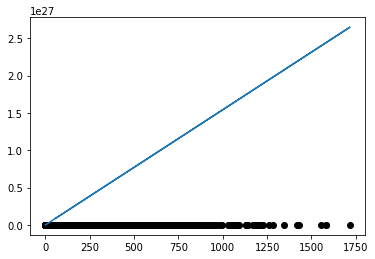

In [156]:
# slope = reg.coef_[0]
# intercept = reg.intercept_


# print("y = %f + %fx" %(intercept, slope))
# print("Mean squared error: %f"
#       % np.mean((reg.predict(x_test) - y_test) ** 2))
# # Explained variance score: 1 is perfect prediction
# print('Variance score: %f' % reg.score(x_test, y_test))

# # Plot outputs
# plt.scatter(y_test, y_test,  color='black')
# # plt.plot(y_test.reshape(1, -1), reg.predict(y_test), color='red',
# #           linewidth=1)

# plt.plot(y_test, y_test*slope**2 + intercept)
# plt.show()

In [145]:
slope?

In [118]:
def getLabel(input):
    Label = []
    for i in range(len(input)):
        if input.values[i]<90.0:
            Label.append('Quater')
        elif input.values[i]>90.0 and input.values[i]<180.0 :
            Label.append('Half Year')
        elif input.values[i]>180.0 and input.values[i]<366.0 :
            Label.append('One Year')
        else:
            Label.append('More than a Year')
    return Label

In [121]:
ll=[]
y_train_label = getLabel(y_train)
y_test_label = getLabel(y_test)
set(Label)

{'Half Year', 'More than a Year', 'One Year', 'Quater'}

In [124]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators=400)
model.fit(x_train, Label)
predicted= model.predict(x_test)
set(predicted)

{'Half Year', 'More than a Year', 'One Year', 'Quater'}

In [134]:

# y_true = ['A', 'A', 'B', 'A']
# y_pred = ['A', 'A', 'C', 'A']
f1_score(predicted, y_test_label, average='macro') 
#mean_squared_error(y_true,y_pred)

0.4414905862693706

In [129]:
# import xgboost as xgb
# gbm = xgb.XGBClassifier(max_depth=10, n_estimators=300, learning_rate=0.05).fit(x_train, y_train)
# predictions = gbm.predict(x_test)
# gbm.score(x_test,y_test)
# set(predictions)

In [171]:
df_permits_col = sf_permits[['Permit Type','Filed Date','Issued Date','Supervisor District','Zipcode','Current Status']]
df_permits_col.columns=['Permit_Type','Filed_Date','Issued_Date','Supervisor_District','Zipcode','Current_Status']
df_permits_col['Issued_Date']= pd.to_datetime((df_permits_col['Issued_Date']), format="%m/%d/%Y")
df_permits_col['Filed_Date']= pd.to_datetime((df_permits_col['Filed_Date']), format="%m/%d/%Y")
df_permits_col['Delay_Time'] = df_permits_col['Issued_Date'].sub(df_permits_col['Filed_Date'], axis=0)
df_permits_col['Delay_Time'] = df_permits_col['Delay_Time'] / np.timedelta64(1, 'D')
df_permits_col = df_permits_col[np.isfinite(df_permits_col['Delay_Time'])]
df_permits_col.date = pd.to_datetime(df_permits_col.Filed_Date)
df_permits_col[['year','month','day']] = df_permits_col.Filed_Date.apply(lambda x: pd.Series(x.strftime("%Y,%m,%d").split(",")))
df_permits_col=df_permits_col.drop(['Filed_Date','Issued_Date','Current_Status'], axis=1)


/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [172]:
df_permits_col

,Permit_Type,Supervisor_District,Zipcode,Delay_Time,year,month,day
0,4,3.0,94102.0,187.0,2015,05,06
1,4,3.0,94102.0,471.0,2016,04,19
3,8,3.0,94109.0,253.0,2016,11,07
4,6,6.0,94102.0,368.0,2016,11,28
5,8,10.0,94107.0,22.0,2017,06,14
6,8,5.0,94122.0,0.0,2017,06,30
7,8,10.0,94124.0,0.0,2017,06,30
8,8,5.0,94117.0,0.0,2017,07,05
9,8,8.0,94117.0,0.0,2017,07,06
10,8,8.0,94114.0,0.0,2017,07,06


In [183]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
reg=linear_model.LinearRegression()

df_x=df_permits_col.drop(['Delay_Time'], axis =1)
df_y=df_permits_col['Delay_Time']

x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size=0.1,random_state=4)


x_train=x_train.fillna(x_train.mean())
y_train=y_train.fillna(y_train.mean())

x_test=x_test.fillna(x_test.mean())
y_test=y_test.fillna(y_test.mean())


model = reg.fit(x_train,y_train)
a=reg.predict(x_test)

from sklearn.metrics import mean_squared_error
mean_squared_error(a,y_test)

5577.2778536187807

In [ ]:
import numpy as np
X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
y = np.array([1, 1, 2, 2])
from sklearn.svm import SVC
clf = SVC()
clf.fit(x_train, y_train) 
prediction=clf.predict(x_test)
mean_squared_error(prediction,y_test)